In [ ]:
import pandas as pd

# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
loan_activities = pd.read_csv('loan_activities.csv')
non_borrower_user = pd.read_csv('non_borrower_user.csv')

# Feature engineering on loan_activities
loan_activities['loan_count'] = loan_activities.groupby('user_id')['loan_type'].transform('count')
loan_activities['emergency_contact'] = loan_activities['reference_contact'].apply(lambda x: 1 if x != '' else 0)

# Aggregate loan_activities data by user_id
loan_activities_agg = loan_activities.groupby('user_id').agg({
    'loan_count': 'max',
    'emergency_contact': 'max'
}).reset_index()

# Merge loan_activities_agg with train and test datasets
train = train.merge(loan_activities_agg, on='user_id', how='left')
test = test.merge(loan_activities_agg, on='user_id', how='left')

# Create flag for non_borrower_user
non_borrower_user['is_non_borrower'] = 1

# Merge non_borrower_user with train and test datasets
train = train.merge(non_borrower_user[['user_id', 'is_non_borrower']], on='user_id', how='left')
test = test.merge(non_borrower_user[['user_id', 'is_non_borrower']], on='user_id', how='left')

# Fill NaN values resulting from merging
train['loan_count'].fillna(0, inplace=True)
train['emergency_contact'].fillna(0, inplace=True)
train['is_non_borrower'].fillna(0, inplace=True)

test['loan_count'].fillna(0, inplace=True)
test['emergency_contact'].fillna(0, inplace=True)
test['is_non_borrower'].fillna(0, inplace=True)



In [ ]:
train

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,pc11,pc12,pc13,pc14,pc15,pc16,label,loan_count,emergency_contact,is_non_borrower
0,3,1.0,1.0,0.275,0.255,0.927273,0.4,0.260,0.040,0.254,...,0.072727,0.023077,0.078431,0.750000,0.018182,0.250000,0.0,0.0,0.0,0.0
1,5,0.0,0.0,0.430,0.365,0.848837,0.4,1.253,0.210,1.235,...,0.151163,0.014366,0.054795,0.500000,0.011628,0.250000,0.0,2.0,1.0,0.0
2,9,1.0,3.0,1.315,0.825,0.627376,0.9,2.385,0.128,2.270,...,0.372624,0.048218,0.054545,0.777778,0.003802,0.111111,0.0,3.0,1.0,0.0
3,10,0.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,2.0,1.0,0.0
4,17,1.0,1.0,0.235,0.160,0.680851,0.1,0.120,0.002,0.104,...,0.319149,0.133333,0.031250,-1.000000,-1.000000,-1.000000,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795251,3431247,0.0,5.0,1.345,1.255,0.933086,0.8,2.833,1.383,2.789,...,0.066914,0.015531,0.031873,1.250000,0.011152,0.375000,0.0,3.0,1.0,0.0
795252,3431248,1.0,4.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,1.0,1.0,0.0
795253,3431254,1.0,2.0,0.355,0.295,0.830986,0.6,0.164,0.039,0.151,...,0.169014,0.079268,0.101695,0.666667,-1.000000,-1.000000,0.0,0.0,0.0,0.0
795254,3431256,1.0,4.0,1.000,0.765,0.765000,0.6,1.282,0.076,1.233,...,0.235000,0.038222,0.039216,1.166667,0.010000,0.333333,0.0,2.0,1.0,0.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795256 entries, 0 to 795255
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            795256 non-null  int64  
 1   pc0                795256 non-null  float64
 2   pc1                795256 non-null  float64
 3   pc2                795256 non-null  float64
 4   pc3                795256 non-null  float64
 5   pc4                795256 non-null  float64
 6   pc5                795256 non-null  float64
 7   pc6                795256 non-null  float64
 8   pc7                795256 non-null  float64
 9   pc8                795256 non-null  float64
 10  pc9                795256 non-null  float64
 11  pc10               795256 non-null  float64
 12  pc11               795255 non-null  float64
 13  pc12               795255 non-null  float64
 14  pc13               795255 non-null  float64
 15  pc14               795255 non-null  float64
 16  pc

In [ ]:
train.isnull().sum()

user_id              0
pc0                  0
pc1                  0
pc2                  0
pc3                  0
pc4                  0
pc5                  0
pc6                  0
pc7                  0
pc8                  0
pc9                  0
pc10                 0
pc11                 1
pc12                 1
pc13                 1
pc14                 1
pc15                 1
pc16                 1
label                1
loan_count           0
emergency_contact    0
is_non_borrower      0
dtype: int64

In [ ]:
train.dropna(inplace=True)
train

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,pc11,pc12,pc13,pc14,pc15,pc16,label,loan_count,emergency_contact,is_non_borrower
0,3,1.0,1.0,0.275,0.255,0.927273,0.4,0.260,0.040,0.254,...,0.072727,0.023077,0.078431,0.750000,0.018182,0.250000,0.0,0.0,0.0,0.0
1,5,0.0,0.0,0.430,0.365,0.848837,0.4,1.253,0.210,1.235,...,0.151163,0.014366,0.054795,0.500000,0.011628,0.250000,0.0,2.0,1.0,0.0
2,9,1.0,3.0,1.315,0.825,0.627376,0.9,2.385,0.128,2.270,...,0.372624,0.048218,0.054545,0.777778,0.003802,0.111111,0.0,3.0,1.0,0.0
3,10,0.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,2.0,1.0,0.0
4,17,1.0,1.0,0.235,0.160,0.680851,0.1,0.120,0.002,0.104,...,0.319149,0.133333,0.031250,-1.000000,-1.000000,-1.000000,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795250,3431244,0.0,2.0,0.660,0.520,0.787879,0.4,0.250,0.010,0.200,...,0.212121,0.200000,0.038462,0.500000,-1.000000,-1.000000,0.0,1.0,1.0,0.0
795251,3431247,0.0,5.0,1.345,1.255,0.933086,0.8,2.833,1.383,2.789,...,0.066914,0.015531,0.031873,1.250000,0.011152,0.375000,0.0,3.0,1.0,0.0
795252,3431248,1.0,4.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,1.0,1.0,0.0
795253,3431254,1.0,2.0,0.355,0.295,0.830986,0.6,0.164,0.039,0.151,...,0.169014,0.079268,0.101695,0.666667,-1.000000,-1.000000,0.0,0.0,0.0,0.0


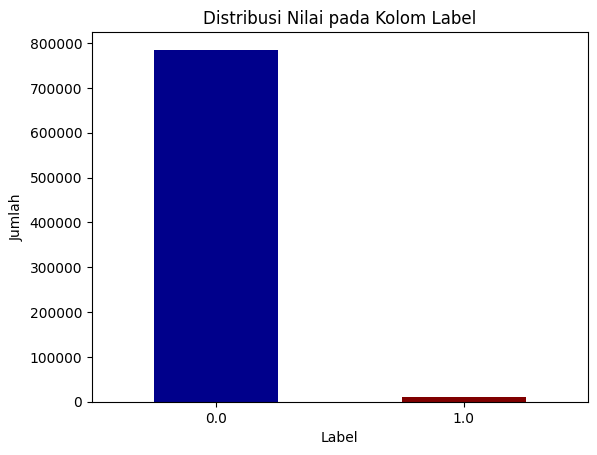

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


label_distribution = train['label'].value_counts()

label_distribution.plot(kind='bar', color=['darkblue', 'maroon'])
plt.title('Distribusi Nilai pada Kolom Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

In [ ]:
import pandas as pd
from sklearn.utils import resample

train_majority = train[train['label'] == 0]
train_minority = train[train['label'] == 1]

train_majority_undersampled = resample(train_majority,
                                       replace=False,
                                       n_samples=len(train_minority),
                                       random_state=42)

train = pd.concat([train_majority_undersampled, train_minority])

train = train.sample(frac=1, random_state=42).reset_index(drop=True)

print(train['label'].value_counts())

label
0.0    10011
1.0    10011
Name: count, dtype: int64


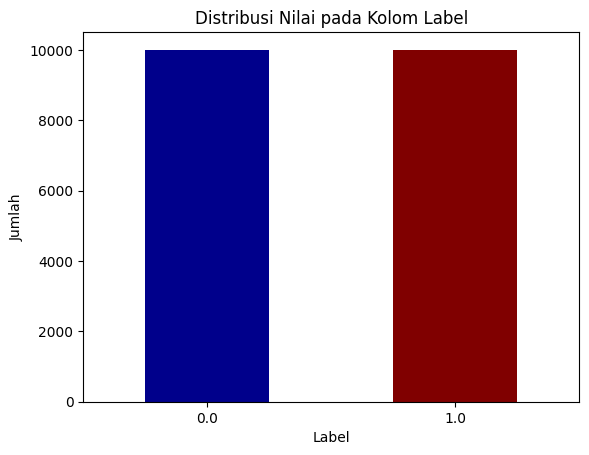

In [ ]:
label_distribution = train['label'].value_counts()

label_distribution.plot(kind='bar', color=['darkblue', 'maroon'])
plt.title('Distribusi Nilai pada Kolom Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

In [ ]:
X = train.drop('label', axis=1)
y = train['label']

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X, y)
    training_score = cross_val_score(classifier, X, y, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")



Classifiers:  LogisticRegression Has a training score of 56.99999999999999 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 50.0 % accuracy score
Classifiers:  SVC Has a training score of 50.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 62.0 % accuracy score


In [ ]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X, y)
y_pred_train = logistic_reg.predict(X)

accuracy = logistic_reg.score(X, y)
print("Accuracy:", accuracy)

from sklearn.metrics import average_precision_score

score = average_precision_score(y, y_pred_train)
print("Average Precision Score:", score)

Accuracy: 0.6568774348216961
Average Precision Score: 0.6018874669480588


In [ ]:
from sklearn.metrics import classification_report


decision_tree = DecisionTreeClassifier(max_depth=25)
decision_tree.fit(X, y)
y_pred_train = decision_tree.predict(X)

accuracy = decision_tree.score(X, y)
print("Accuracy:", accuracy)

from sklearn.metrics import average_precision_score

score = average_precision_score(y, y_pred_train)
print("Average Precision Score:", score)

print(classification_report(y, y_pred_train))

Accuracy: 0.9188392767955249
Average Precision Score: 0.8718796835044818
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92     10011
         1.0       0.89      0.96      0.92     10011

    accuracy                           0.92     20022
   macro avg       0.92      0.92      0.92     20022
weighted avg       0.92      0.92      0.92     20022



In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = train.drop(['label','user_id'], axis=1)
random_forest = RandomForestClassifier()
random_forest.fit(X, y)
y_pred_train = random_forest.predict(X)

accuracy = random_forest.score(X, y)
print("Accuracy:", accuracy)

from sklearn.metrics import average_precision_score

score = average_precision_score(y, y_pred_train)
print("Average Precision Score:", score)

print(classification_report(y, y_pred_train))

Accuracy: 0.8515133353311357
Average Precision Score: 0.7815172205922323
              precision    recall  f1-score   support

         0.0       0.92      0.77      0.84     10011
         1.0       0.80      0.94      0.86     10011

    accuracy                           0.85     20022
   macro avg       0.86      0.85      0.85     20022
weighted avg       0.86      0.85      0.85     20022



Epoch 1/100
626/626 [==============================] - 8s 10ms/step - loss: 1192.5385 - accuracy: 0.5072 - val_loss: 555.4601 - val_accuracy: 0.5000
Epoch 2/100
626/626 [==============================] - 2s 3ms/step - loss: 338.3368 - accuracy: 0.5021 - val_loss: 106.0798 - val_accuracy: 0.5051
Epoch 3/100
626/626 [==============================] - 2s 3ms/step - loss: 350.7656 - accuracy: 0.5076 - val_loss: 469.1146 - val_accuracy: 0.5007
Epoch 4/100
626/626 [==============================] - 2s 4ms/step - loss: 341.4316 - accuracy: 0.5123 - val_loss: 287.2750 - val_accuracy: 0.5015
Epoch 5/100
626/626 [==============================] - 2s 4ms/step - loss: 309.4899 - accuracy: 0.5101 - val_loss: 588.7668 - val_accuracy: 0.5009
Epoch 6/100
626/626 [==============================] - 3s 4ms/step - loss: 290.5534 - accuracy: 0.5157 - val_loss: 140.5942 - val_accuracy: 0.5049
Epoch 7/100
626/626 [==============================] - 4s 7ms/step - loss: 278.6087 - accuracy: 0.5098 - val_loss: 3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67     10011
         1.0       0.00      0.00      0.00     10011

    accuracy                           0.50     20022
   macro avg       0.25      0.50      0.33     20022
weighted avg       0.25      0.50      0.33     20022

[[10011     0]
 [10011     0]]


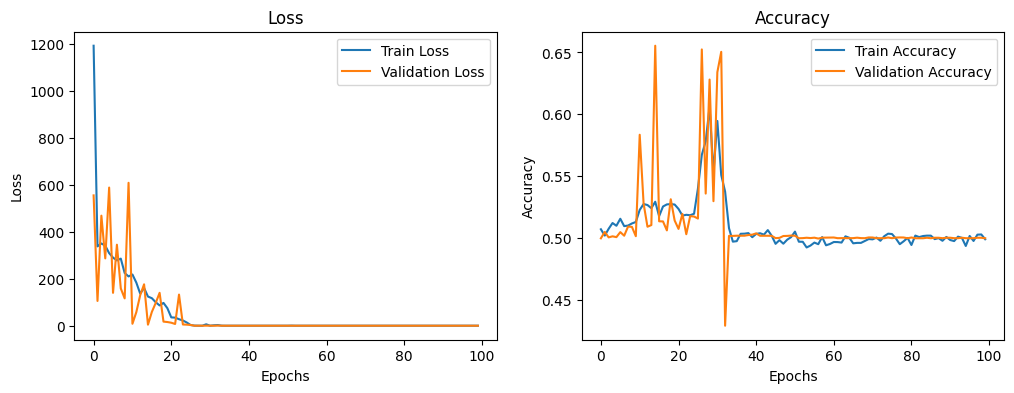

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
# Bangun model ANN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_dim=X.shape[1], activation='relu'),  # Input layer dengan 16 neuron
    tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer dengan 32 neuron
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer dengan 1 neuron (binary classification)
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Latih model
history = model.fit(X, y, epochs=100, batch_size=32, validation_data=(X, y))

# Evaluasi model
y_pred_train = (model.predict(X) > 0.5).astype("int32")
print(classification_report(y, y_pred_train))
print(confusion_matrix(y, y_pred_train))

# Plotting training & validation loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
X_test = test.drop(columns=['user_id'])


y_pred_test = random_forest.predict(X_test)

# Buat file submission
submission = pd.DataFrame({
    'user_id': test['user_id'],
    'label': y_pred_test
})

# Simpan file submission
submission.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")

Submission file created: submission.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Load train and test datasets
train_df = train.copy()
test_df = test.copy()

# Drop the 'user_id' column if it exists
if 'user_id' in train_df.columns:
    train_df = train_df.drop(columns=['user_id'])

# Assuming your label column is named 'label'. Adjust it to your actual label column name.
label_column = 'label'

# Split the train_df into training and temporary set (which will be further split into validation and test sets)
train_set, temp_set = train_test_split(train_df, test_size=0.3, random_state=42, stratify=train_df[label_column])

# Split the temporary set into validation and test sets
val_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42, stratify=temp_set[label_column])

# Separate features and labels
X_train = train_set.drop(label_column, axis=1)
y_train = train_set[label_column]

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Initialize and train the RandomForestClassifier model with class_weight balanced
rf = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42, class_weight='balanced')
rf.fit(X_train_sm, y_train_sm)

# Separate features and labels for validation and test sets
X_val = val_set.drop(label_column, axis=1)
y_val = val_set[label_column]
X_test = test_set.drop(label_column, axis=1)
y_test = test_set[label_column]

# Apply SMOTE to the validation data
X_val_sm, y_val_sm = smote.fit_resample(X_val, y_val)

# Apply SMOTE to the test data
X_test_sm, y_test_sm = smote.fit_resample(X_test, y_test)

# Predict on the validation set
y_val_pred = rf.predict(X_val_sm)

# Print the classification report for the validation set
print("Classification report for the validation set:")
print(classification_report(y_val_sm, y_val_pred, target_names=['Not Fraud', 'Fraud']))

# Predict on the test set
y_test_pred = rf.predict(X_test_sm)

# Print the classification report for the test set
print("Classification report for the test set:")
print(classification_report(y_test_sm, y_test_pred, target_names=['Not Fraud', 'Fraud']))

# Predict on the actual test data (without SMOTE)
X_test_actual = test_df.drop(columns=['user_id'])
y_test_actual_pred = rf.predict(X_test_actual)

# Create the submission file
submission = pd.DataFrame({
    'user_id': test_df['user_id'],
    'label': y_test_actual_pred
})

# Save the submission file
submission.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")


Classification report for the validation set:
              precision    recall  f1-score   support

   Not Fraud       0.71      0.64      0.67      1502
       Fraud       0.67      0.74      0.71      1502

    accuracy                           0.69      3004
   macro avg       0.69      0.69      0.69      3004
weighted avg       0.69      0.69      0.69      3004

Classification report for the test set:
              precision    recall  f1-score   support

   Not Fraud       0.74      0.68      0.71      1502
       Fraud       0.71      0.76      0.73      1502

    accuracy                           0.72      3004
   macro avg       0.72      0.72      0.72      3004
weighted avg       0.72      0.72      0.72      3004

Submission file created: submission.csv


In [ ]:
import joblib
model_filename = 'random_forest_model.pkl'
joblib.dump(rf, model_filename)
print(f"Model saved to {model_filename}")

Model saved to random_forest_model.pkl


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.utils import resample

# Load train and test datasets
train_df = train.copy()
test_df = test.copy()


# Drop the 'user_id' column if it exists for training
if 'user_id' in train_df.columns:
    train_df = train_df.drop(columns=['user_id'])

# Assuming your label column is named 'label'. Adjust it to your actual label column name.
label_column = 'label'

# Split the train_df into training and temporary set (which will be further split into validation and test sets)
train_set, temp_set = train_test_split(train_df, test_size=0.3, random_state=42, stratify=train_df[label_column])

# Split the temporary set into validation and test sets
val_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42, stratify=temp_set[label_column])

# Separate features and labels
x_train = train_set.drop(label_column, axis=1).values
y_train = train_set[label_column].values
x_val = val_set.drop(label_column, axis=1).values
y_val = val_set[label_column].values
x_test = test_set.drop(label_column, axis=1).values
y_test = test_set[label_column].values

# Combine x_train and y_train into a single DataFrame
train_combined = pd.DataFrame(x_train)
train_combined[label_column] = y_train

# Separate majority and minority classes
df_majority = train_combined[train_combined[label_column] == 0]
df_minority = train_combined[train_combined[label_column] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42) # reproducible results

# Combine majority class with upsampled minority class
train_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Separate features and labels
x_train_b = train_upsampled.drop(label_column, axis=1).values
y_train_b = train_upsampled[label_column].values

# Train the model with upsampled data
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(x_train_b, y_train_b)

# Predict on the validation set
y_val_pred = logistic_model.predict(x_val)

# Print the classification report for the validation set
print("Classification report for the validation set:")
print(classification_report(y_val, y_val_pred, target_names=['Not Fraud', 'Fraud']))

# Predict on the test set
y_test_pred = logistic_model.predict(x_test)

# Print the classification report for the test set
print("Classification report for the test set:")
print(classification_report(y_test, y_test_pred, target_names=['Not Fraud', 'Fraud']))

# Prepare the test data for prediction, drop 'user_id' if exists
X_final_test = test_df.drop(columns=['user_id']) if 'user_id' in test_df.columns else test_df

# Apply the trained model to the test dataset
test_predictions = logistic_model.predict(X_final_test)

# Save the predictions to a CSV file, assuming 'user_id' column is present in test_df for final output
submission_df = pd.DataFrame({
    'user_id': test_df['user_id'],  # Use 'user_id' from the original test dataset
    'label': test_predictions
})

# Save to a CSV file
submission_df.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Classification report for the validation set:
              precision    recall  f1-score   support

   Not Fraud       0.72      0.63      0.67      1502
       Fraud       0.67      0.76      0.71      1501

    accuracy                           0.69      3003
   macro avg       0.70      0.69      0.69      3003
weighted avg       0.70      0.69      0.69      3003

Classification report for the test set:
              precision    recall  f1-score   support

   Not Fraud       0.75      0.67      0.71      1502
       Fraud       0.70      0.78      0.74      1502

    accuracy                           0.72      3004
   macro avg       0.73      0.72      0.72      3004
weighted avg       0.73      0.72      0.72      3004

Submission file created: submission.csv
